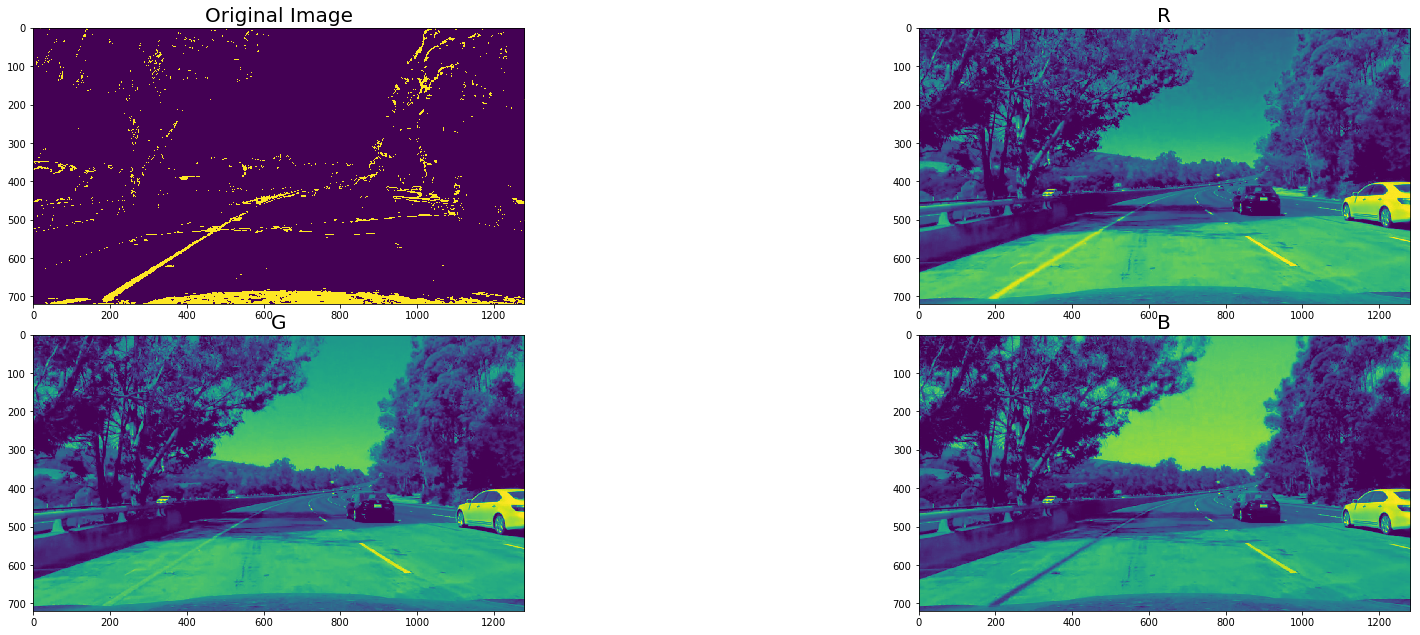

In [22]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2

# Read in an image, you can also try test1.jpg or test4.jpg
#image = mpimg.imread('colorspace_test_images/test6.jpg') 
image = mpimg.imread('bridge_shadow.jpg')
R = image[:,:,0]
G = image[:,:,1]
B = image[:,:,2]
# TODO: Define a function that thresholds the S-channel of HLS
# Use exclusive lower bound (>) and inclusive upper (<=)
def rgb_select(img, thresh=(100, 255)):
    # 1) Convert to HLS color space
    R = image[:,:,0]
    G = image[:,:,1]
    B = image[:,:,2]
    # 2) Apply a threshold to the S channel
    binary = np.zeros_like(R)
    binary[((R > thresh[0]) & (R <= thresh[1]))& (B < 100)] = 1
    # 3) Return a binary image of threshold result
    #binary_output = np.copy(img) # placeholder line
    return binary
    
# Optional TODO - tune the threshold to try to match the above image!    
rgb_binary = rgb_select(image, thresh=(90, 255))

# Plot the result
f, ax = plt.subplots(2, 2, figsize=(24, 9))
f.tight_layout()
ax[0,0].imshow(rgb_binary)
ax[0,0].set_title('Original Image', fontsize=20)
ax[0,1].imshow(R)
ax[0,1].set_title('R', fontsize=20)
ax[1,0].imshow(G)
ax[1,0].set_title('G', fontsize=20)
ax[1,1].imshow(B)
ax[1,1].set_title('B', fontsize=20)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

In [ ]:
# Define a function that thresholds the S-channel of HLS
def hls_select(img, thresh=(0, 255)):
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    s_channel = hls[:,:,2]
    binary_output = np.zeros_like(s_channel)
    binary_output[(s_channel > thresh[0]) & (s_channel <= thresh[1])] = 1
    return binary_output

hls_binary = hls_select(image, thresh=(90, 255))